In [83]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

In [84]:
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [85]:
cmap=ListedColormap(['blue','green','red'])

In [86]:
x,y=iris.data,iris.target
print(x.shape,y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1234)
x_train[0],y_train[0]


(150, 4) (150,)


(array([5.1, 3.4, 1.5, 0.2]), np.int64(0))

In [116]:

print(min(iris.data[iris.target==0][:,1]))
max(iris.data[iris.target==0][:,1])

2.3


np.float64(4.4)

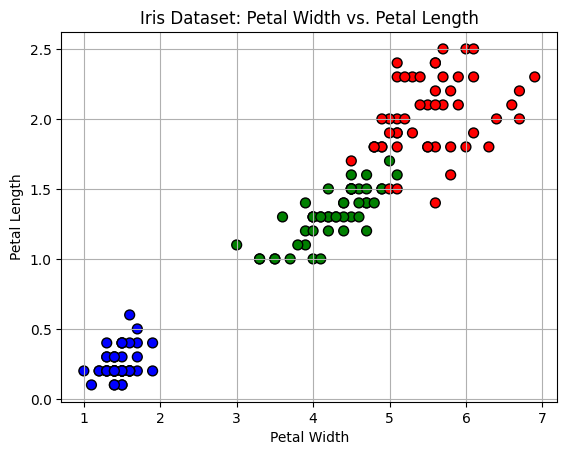

In [118]:
# colors = np.array(['green', 'blue', 'red'])
plt.figure()
# plt.scatter(x[:,3],x[:,2],c=colors[y],cmap=cmap,edgecolors='black',s=50)
plt.scatter(x[:,2],x[:,3],c=y,cmap=cmap,edgecolors='black',s=50)
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Iris Dataset: Petal Width vs. Petal Length') 
plt.grid(True)
plt.show()

In [95]:
# def highestFreq(lis):
#     res={}
#     for item in lis:
#         if item in res:
#             res[item]+=1
#         else:
#             res[item]=1
#     return max(res.items(),key=lambda x:x[1])[0]
    

def euclideanDistance(x,y):
    return np.sqrt(np.sum(x-y)**2)


class KNN():
    def __init__(self,k):
        self.k=k

    def train(self,x,y):
        self.X_train=x
        self.Y_train=y
    
    def predict(self,X_test):
        pred_labels=[self._predict(x) for x in X_test]
        return np.array(pred_labels)

    def _predict(self,X_test):
        distances=[euclideanDistance(x_train,X_test) for x_train in self.X_train]
        KNearest=np.argsort(distances)[:self.k]
        kNearestLabels=[self.Y_train[i] for i in KNearest]
        mostCommonClass=Counter(kNearestLabels).most_common(1)
        return mostCommonClass[0][0]

    

In [96]:
clf=KNN(3)
clf.train(x_train,y_train)
pred=clf.predict(x_test)
pred


array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0])

In [100]:
acc=np.sum(pred==y_test)/len(y_test)
acc.

np.float64(0.9)